# Predicting MLB Players Salaries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [2]:
batting = pd.read_csv('core/Batting.csv')
pitching = pd.read_csv('core/Pitching.csv')
salaries = pd.read_csv('core/Salaries.csv')
all_star = pd.read_csv('core/AllStarFull.csv')
cpi = pd.read_csv('core/CPI.csv')

# Data Wrangling

In [3]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [4]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,107429.000000,106673.000000,105061.000000,83888.000000,107429.000000,105329.000000,70778.000000,104612.000000,101360.000000,71325.000000,81988.000000
mean,1966.552141,1.079206,51.134098,140.454551,18.639818,36.714863,6.254261,1.260619,2.864785,16.929664,2.948135,1.192960,12.948785,20.677297,1.072664,1.063874,2.225345,1.036775,2.926404
std,39.549982,0.287394,47.015896,184.286687,28.161252,52.399701,9.667879,2.608268,6.396150,26.336778,7.649862,2.699623,20.683452,28.606481,2.731013,2.299923,4.175046,1.943212,4.698823
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1936.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,47.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,1.000000,80.000000,228.000000,27.000000,57.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2019.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [5]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [6]:
salaries.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


After inspection of the Salary data, we see that it only containes salaries 1985 and after

In [7]:
all_star.head()

,playerID,yearID,GP
0,gomezle01,1933.0,1
1,ferreri01,1933.0,1
2,gehrilo01,1933.0,1
3,gehrich01,1933.0,1
4,dykesji01,1933.0,1


In [8]:
all_star.describe()

,yearID,GP
count,5374.000000,5375.000000
mean,1978.629512,0.780465
std,24.866550,0.413970
min,1933.000000,0.000000
25%,1959.000000,1.000000
50%,1979.000000,1.000000
75%,2001.000000,1.000000
max,2019.000000,1.000000


Remove pitchers data

In [9]:
pitchers = np.unique(pitching.playerID)
pitchers = pd.DataFrame(pitchers)

In [10]:
pitchers

,0
0,aardsda01
1,aasedo01
2,abadfe01
3,abbeybe01
4,abbeych01
...,...
9840,zoldasa01
9841,zuberbi01
9842,zumayjo01
9843,zuverge01


In [11]:
pitchers.columns = ['playerID']
all_df = pd.merge(batting, pitchers, how='outer', on='playerID', indicator=True)
batting_stats = all_df[all_df['_merge'] == 'left_only']
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,left_only
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,left_only
2,addybo01,1873,1,PH2,NaN,10,51,12,16,1,...,1.0,1.0,2,0.0,NaN,NaN,NaN,NaN,0.0,left_only
3,addybo01,1873,2,BS1,NaN,31,152,37,54,6,...,6.0,5.0,2,1.0,NaN,NaN,NaN,NaN,0.0,left_only
4,addybo01,1874,1,HR1,NaN,50,213,25,51,9,...,4.0,2.0,1,1.0,NaN,NaN,NaN,NaN,0.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107413,waltodo01,2019,1,SEA,AL,7,16,2,3,0,...,0.0,1.0,3,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107418,wongke01,2019,1,TBA,AL,6,14,1,3,0,...,0.0,1.0,0,5.0,0.0,0.0,0.0,0.0,0.0,left_only
107419,wongke01,2019,2,LAA,AL,1,4,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,left_only
107423,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,2.0,4.0,32,107.0,1.0,4.0,1.0,3.0,4.0,left_only


Remove any players statistics before the year 1985 and after 2016 because there is no salary data for them

In [12]:
batting_stats = batting_stats[batting_stats.yearID > 1984]
batting_stats = batting_stats[batting_stats.yearID < 2017]
batting_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge
47356,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,8.0,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only
47357,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,3.0,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only
47433,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only
48114,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,0.0,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only
48115,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105967,valaipa01,2016,1,COL,NL,13,19,3,5,1,...,0.0,0.0,0,8.0,0.0,0.0,0.0,0.0,0.0,left_only
105972,vogelda01,2016,1,SEA,AL,8,12,0,1,0,...,0.0,0.0,1,6.0,0.0,0.0,0.0,0.0,0.0,left_only
105976,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only
105984,wendljo01,2016,1,OAK,AL,28,96,11,25,1,...,2.0,0.0,6,16.0,0.0,0.0,0.0,2.0,3.0,left_only


In [13]:
batting_sal = pd.merge(batting_stats, salaries)
batting_sal

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,1.0,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,0.0,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,2.0,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,0.0,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,3.0,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,1.0,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,5.0,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500


In [14]:
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary
count,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.000000,12329.00000,12329.000000,1.232900e+04
mean,2000.288669,1.006327,96.153703,313.081191,43.153865,83.888799,16.250466,1.799254,9.654068,41.294509,6.254441,2.648796,31.210074,56.718225,2.668748,2.888474,1.912402,2.70395,7.184443,2.285519e+06
std,8.825493,0.085208,46.030116,189.846077,31.403513,56.052862,11.852286,2.291220,10.068848,31.879355,9.887397,3.333790,24.967474,38.026210,4.162843,3.456362,2.908364,2.52469,5.635567,3.749212e+06
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00
25%,1993.000000,1.000000,59.000000,143.000000,16.000000,34.000000,6.000000,0.000000,2.000000,15.000000,0.000000,0.000000,11.000000,26.000000,0.000000,0.000000,0.000000,1.00000,3.000000,3.000000e+05
50%,2000.000000,1.000000,102.000000,309.000000,38.000000,79.000000,15.000000,1.000000,6.000000,35.000000,2.000000,2.000000,26.000000,51.000000,1.000000,2.000000,1.000000,2.00000,6.000000,6.250000e+05
75%,2008.000000,1.000000,138.000000,483.000000,67.000000,130.000000,25.000000,3.000000,14.000000,62.000000,8.000000,4.000000,46.000000,82.000000,4.000000,4.000000,3.000000,4.00000,11.000000,2.550000e+06
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.00000,35.000000,3.300000e+07


Remove any player who made under the minimum salary of 60K since 1985

In [15]:
batting_sal = batting_sal[batting_sal.salary >= 60000]
batting_sal['min_salary'] = batting_sal['salary'].groupby(batting_sal['yearID']).transform('min')
batting_sal

<ipython-input-15-80e8b18b7fa1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_sal['min_salary'] = batting_sal['salary'].groupby(batting_sal['yearID']).transform('min')


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,_merge,salary,min_salary
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,86,35.0,5.0,4.0,1.0,4.0,10.0,left_only,358858,60000
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,30,31.0,0.0,4.0,0.0,1.0,2.0,left_only,1000000,60000
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,10,4.0,3.0,0.0,0.0,0.0,1.0,left_only,300000,60000
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,22,22.0,1.0,0.0,0.0,2.0,2.0,left_only,225000,60000
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,25,25.0,2.0,0.0,0.0,3.0,6.0,left_only,275000,60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,36,112.0,4.0,4.0,2.0,2.0,4.0,left_only,507500,507500
12325,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,18,54.0,0.0,2.0,3.0,2.0,3.0,left_only,507500,507500
12326,storytr01,2016,1,COL,NL,97,372,67,101,21,...,35,130.0,2.0,5.0,2.0,1.0,5.0,left_only,507500,507500
12327,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,15,22.0,0.0,1.0,0.0,0.0,1.0,left_only,507500,507500


Remove any player who had less than 25 At Bats so AVGs are more realistic 

In [16]:
batting_sal = batting_sal[batting_sal.AB > 25]
batting_sal.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,salary,min_salary
count,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,...,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,11727.000000,1.172700e+04,11727.000000
mean,2000.368892,1.005116,100.605440,328.477872,45.292487,88.071544,17.062846,1.889145,10.140871,43.363776,...,2.777522,32.757739,59.457406,2.802592,3.031807,2.003752,2.837725,7.537307,2.377120e+06,234455.420142
std,8.852556,0.075980,42.639403,181.726083,30.702815,54.255176,11.580730,2.313187,10.085619,31.314120,...,3.366450,24.620228,36.961212,4.224794,3.483338,2.952028,2.515756,5.551669,3.811498e+06,151576.316408
min,1985.000000,1.000000,7.000000,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+04,60000.000000
25%,1993.000000,1.000000,67.000000,164.000000,19.000000,40.000000,7.000000,0.000000,2.000000,17.000000,...,0.000000,13.000000,29.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.081665e+05,109000.000000
50%,2000.000000,1.000000,105.000000,325.000000,41.000000,84.000000,16.000000,1.000000,7.000000,37.000000,...,2.000000,27.000000,54.000000,1.000000,2.000000,1.000000,2.000000,6.000000,6.950000e+05,200000.000000
75%,2008.000000,1.000000,139.000000,491.000000,68.000000,133.000000,25.000000,3.000000,15.000000,63.000000,...,4.000000,47.000000,84.000000,4.000000,4.000000,3.000000,4.000000,11.000000,2.750000e+06,390000.000000
max,2016.000000,3.000000,163.000000,716.000000,152.000000,240.000000,59.000000,23.000000,73.000000,165.000000,...,29.000000,232.000000,212.000000,120.000000,35.000000,39.000000,16.000000,35.000000,3.300000e+07,507500.000000


Add AllStar appearences as a feature

In [17]:
all_star['allStar'] = 1
batting_all = pd.merge(batting_sal, all_star, how='left', on=['playerID','yearID'])
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,_merge,salary,min_salary,GP,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,5.0,4.0,1.0,4.0,10.0,left_only,358858,60000,1.0,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,4.0,0.0,1.0,2.0,left_only,1000000,60000,NaN,NaN
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,3.0,0.0,0.0,0.0,1.0,left_only,300000,60000,NaN,NaN
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,1.0,0.0,0.0,2.0,2.0,left_only,225000,60000,NaN,NaN
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,2.0,0.0,0.0,3.0,6.0,left_only,275000,60000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,4.0,4.0,2.0,2.0,4.0,left_only,507500,507500,NaN,NaN
11724,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,0.0,2.0,3.0,2.0,3.0,left_only,507500,507500,NaN,NaN
11725,storytr01,2016,1,COL,NL,97,372,67,101,21,...,2.0,5.0,2.0,1.0,5.0,left_only,507500,507500,NaN,NaN
11726,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,1.0,0.0,0.0,1.0,left_only,507500,507500,NaN,NaN


In [18]:
batting_all = batting_all.fillna({'allStar':0})
batting_all

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,IBB,HBP,SH,SF,GIDP,_merge,salary,min_salary,GP,allStar
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,5.0,4.0,1.0,4.0,10.0,left_only,358858,60000,1.0,1.0
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,0.0,4.0,0.0,1.0,2.0,left_only,1000000,60000,NaN,0.0
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,3.0,0.0,0.0,0.0,1.0,left_only,300000,60000,NaN,0.0
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,1.0,0.0,0.0,2.0,2.0,left_only,225000,60000,NaN,0.0
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,2.0,0.0,0.0,3.0,6.0,left_only,275000,60000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,naquity01,2016,1,CLE,AL,116,321,52,95,18,...,4.0,4.0,2.0,2.0,4.0,left_only,507500,507500,NaN,0.0
11724,rickajo01,2016,1,BAL,AL,85,257,32,69,13,...,0.0,2.0,3.0,2.0,3.0,left_only,507500,507500,NaN,0.0
11725,storytr01,2016,1,COL,NL,97,372,67,101,21,...,2.0,5.0,2.0,1.0,5.0,left_only,507500,507500,NaN,0.0
11726,walshco02,2016,1,MIL,NL,38,47,4,4,1,...,0.0,1.0,0.0,0.0,1.0,left_only,507500,507500,NaN,0.0


Add amount of years played in MLB as a feature

In [19]:
batting_all['Years Played'] = batting_all.groupby('playerID').cumcount() + 1
batting_all.sort_values(by=['playerID', 'yearID'])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,HBP,SH,SF,GIDP,_merge,salary,min_salary,GP,allStar,Years Played
6923,abbotje01,1998,1,CHA,AL,89,244,33,68,14,...,0.0,2.0,5.0,2.0,left_only,175000,170000,NaN,0.0,1
6924,abbotje01,1999,1,CHA,AL,17,57,5,9,0,...,0.0,1.0,1.0,4.0,left_only,255000,200000,NaN,0.0,2
6925,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,2.0,2.0,1.0,2.0,left_only,255000,200000,NaN,0.0,3
6926,abbotje01,2001,1,FLO,NL,28,42,5,11,3,...,1.0,0.0,0.0,1.0,left_only,300000,200000,NaN,0.0,4
5210,abbotku01,1993,1,OAK,AL,20,61,11,15,1,...,0.0,3.0,0.0,3.0,left_only,109000,100000,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8482,zuletju01,2001,1,CHN,NL,49,106,11,23,3,...,3.0,0.0,1.0,3.0,left_only,200000,200000,NaN,0.0,1
11597,zuninmi01,2014,1,SEA,AL,131,438,51,87,20,...,17.0,0.0,4.0,12.0,left_only,504100,500000,NaN,0.0,1
11598,zuninmi01,2015,1,SEA,AL,112,350,28,61,11,...,5.0,8.0,2.0,6.0,left_only,523500,507500,NaN,0.0,2
4757,zupcibo01,1992,1,BOS,AL,124,392,46,108,19,...,4.0,7.0,4.0,6.0,left_only,109000,109000,NaN,0.0,1


In [20]:
batting_all['AVG'] = batting_all.H / batting_all.AB 
batting_all['AVG']

0        0.264198
1        0.219409
2        0.266667
3        0.327869
4        0.255000
           ...   
11723    0.295950
11724    0.268482
11725    0.271505
11726    0.085106
11727    0.258537
Name: AVG, Length: 11728, dtype: float64

In [50]:
batting_all['OBP'] = (batting_all.H + batting_all.BB + batting_all.HBP)/(batting_all.AB + batting_all.BB + 
                                    batting_all.HBP + batting_all.SF)
batting_all['OBP'].describe()

count    11728.000000
mean         0.323985
std          0.048482
min          0.068966
25%          0.296685
50%          0.325725
75%          0.354745
max          0.609400
Name: OBP, dtype: float64

Salary adjustment using CPI data from BLS database

In [51]:
salary_adj = pd.merge(batting_all, cpi, how='left', on='yearID')
salary_adj['salary2016'] = (240/salary_adj.CPI)*salary_adj.salary
salary_adj['min_salary2016'] =(240/salary_adj.CPI)*salary_adj.min_salary
salary_adj.head(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,salary,min_salary,GP,allStar,Years Played,AVG,OBP,CPI,salary2016,min_salary2016
0,rosepe01,1985,1,CIN,NL,119,405,60,107,12,...,358858,60000,1.0,1.0,1,0.264198,0.394790,107.6,8.004268e+05,133828.996283
1,rosepe01,1986,1,CIN,NL,72,237,15,52,8,...,1000000,60000,NaN,0.0,2,0.219409,0.316176,109.6,2.189781e+06,131386.861314
2,staubru01,1985,1,NYN,NL,54,45,2,12,3,...,300000,60000,NaN,0.0,1,0.266667,0.400000,107.6,6.691450e+05,133828.996283
3,perezto01,1985,1,CIN,NL,72,183,25,60,8,...,225000,60000,NaN,0.0,1,0.327869,0.396135,107.6,5.018587e+05,133828.996283
4,perezto01,1986,1,CIN,NL,77,200,14,51,12,...,275000,60000,NaN,0.0,2,0.255000,0.333333,109.6,6.021898e+05,131386.861314
5,carewro01,1985,1,CAL,AL,127,443,69,124,17,...,875000,60000,NaN,0.0,1,0.279910,0.371316,107.6,1.951673e+06,133828.996283
6,jacksre01,1985,1,CAL,AL,143,460,64,116,27,...,1058894,60000,NaN,0.0,1,0.252174,0.360444,107.6,2.361845e+06,133828.996283
7,jacksre01,1986,1,CAL,AL,132,419,65,101,12,...,1102946,60000,NaN,0.0,2,0.241050,0.379110,109.6,2.415210e+06,131386.861314
8,nettlgr01,1985,1,SDN,NL,137,440,66,115,23,...,900000,60000,1.0,1.0,1,0.261364,0.363107,107.6,2.007435e+06,133828.996283
9,nettlgr01,1986,1,SDN,NL,126,354,36,77,9,...,912247,60000,NaN,0.0,2,0.217514,0.300000,109.6,1.997621e+06,131386.861314


# EDA

Text(0.5, 1.0, 'PDF of Games Played')

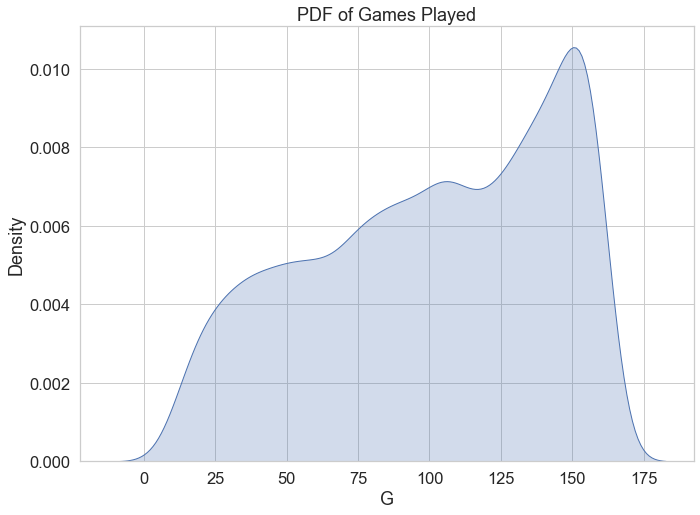

In [52]:
sns.kdeplot(salary_adj.G, shade=True)
plt.title("PDF of Games Played")

Text(0.5, 1.0, 'PDF of At Bats')

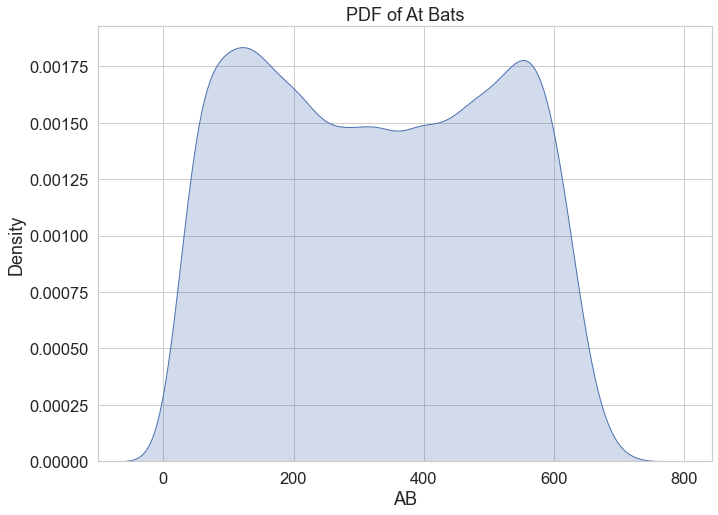

In [53]:
sns.kdeplot(salary_adj.AB, shade=True)
plt.title("PDF of At Bats")

Text(0.5, 1.0, 'PDF of Runs Scored')

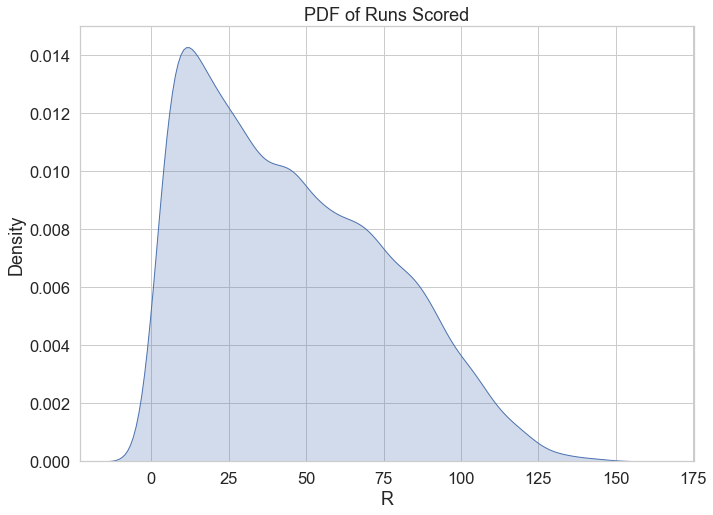

In [54]:
sns.kdeplot(salary_adj.R, shade=True)
plt.title("PDF of Runs Scored")

Text(0.5, 1.0, 'PDF of Total Hits')

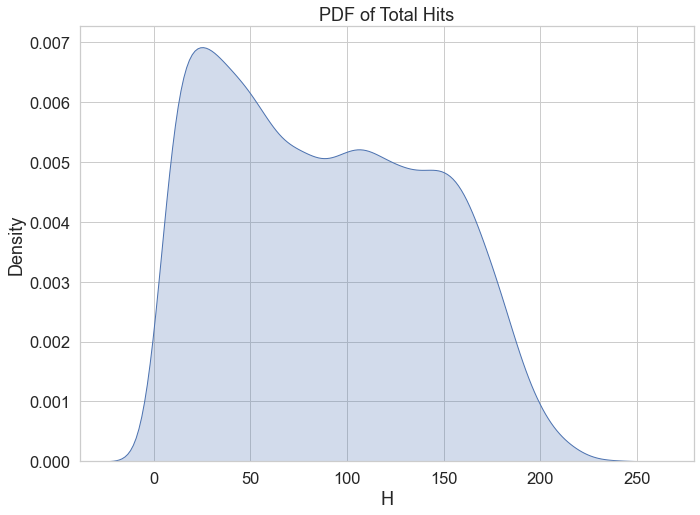

In [55]:
sns.kdeplot(salary_adj.H, shade=True)
plt.title("PDF of Total Hits")

Text(0.5, 1.0, 'PDF of Doubles')

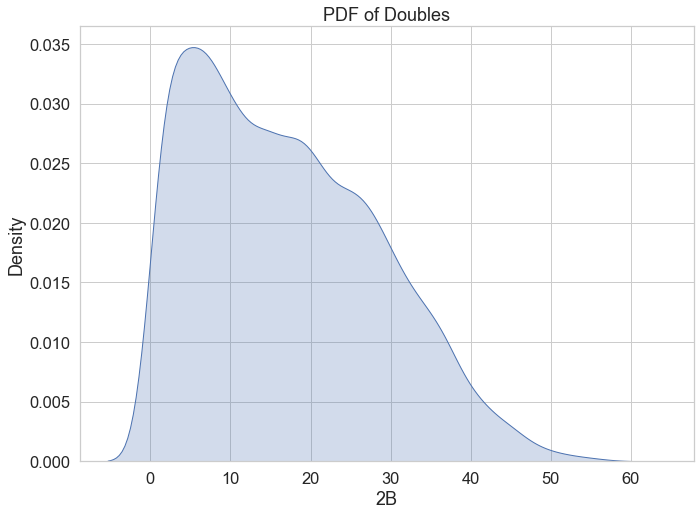

In [56]:
sns.kdeplot(salary_adj['2B'], shade=True)
plt.title("PDF of Doubles")

Text(0.5, 1.0, 'PDF of Triples')

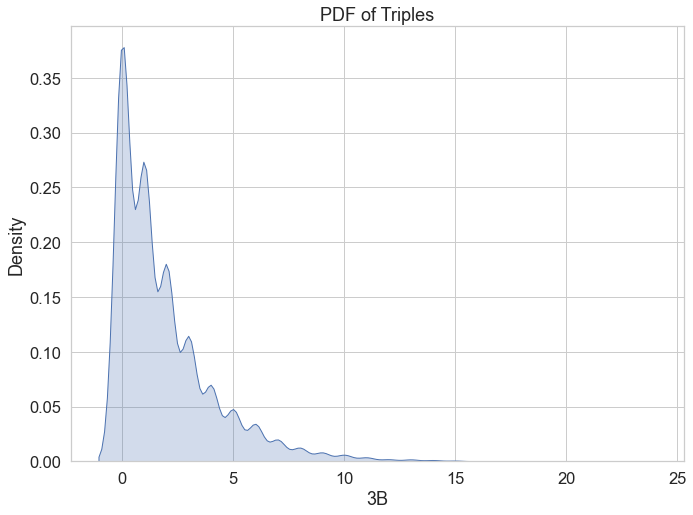

In [57]:
sns.kdeplot(salary_adj['3B'], shade=True)
plt.title("PDF of Triples")

Text(0.5, 1.0, 'PDF of Home Runs')

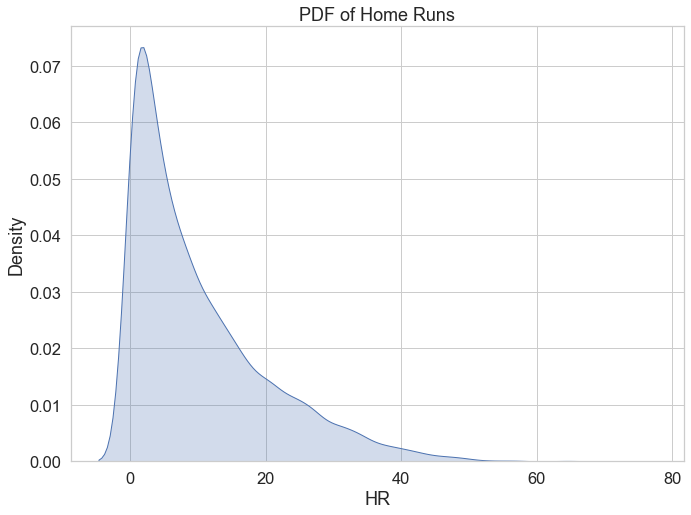

In [58]:
sns.kdeplot(salary_adj['HR'], shade=True)
plt.title("PDF of Home Runs")

Text(0.5, 1.0, 'PDF of Runs Batted In')

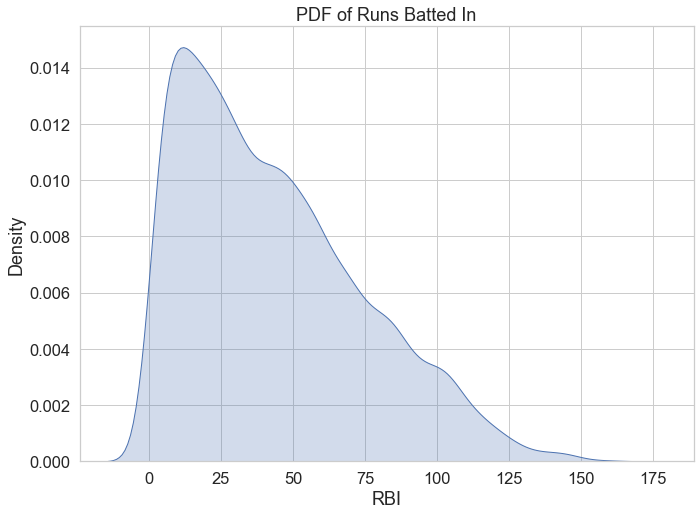

In [59]:
sns.kdeplot(salary_adj['RBI'], shade=True)
plt.title("PDF of Runs Batted In")

Text(0.5, 1.0, 'PDF of Stolen Bases')

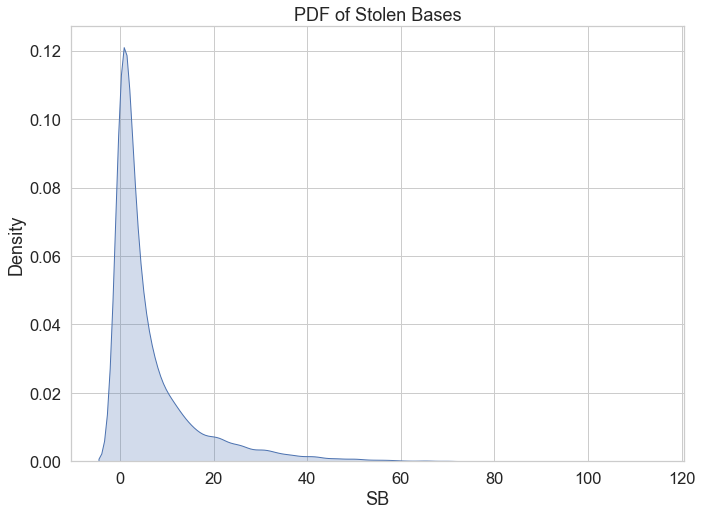

In [60]:
sns.kdeplot(salary_adj['SB'], shade=True)
plt.title("PDF of Stolen Bases")

Text(0.5, 1.0, 'PDF of Walks')

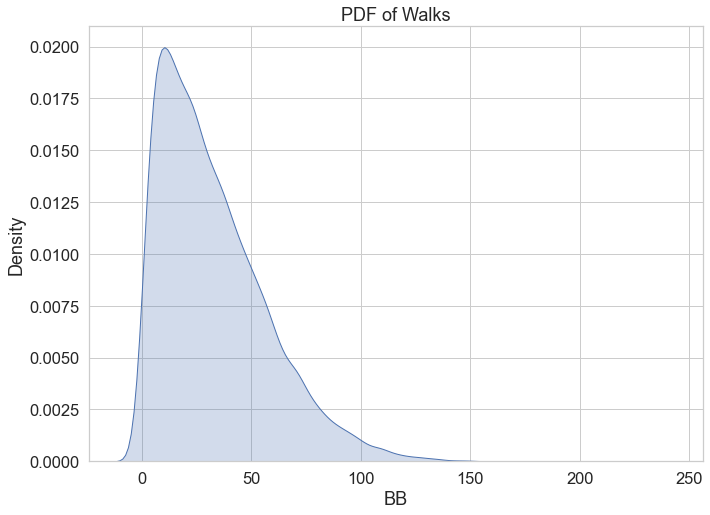

In [61]:
sns.kdeplot(salary_adj['BB'], shade=True)
plt.title("PDF of Walks")

Text(0.5, 1.0, 'PDF of Strikeouts')

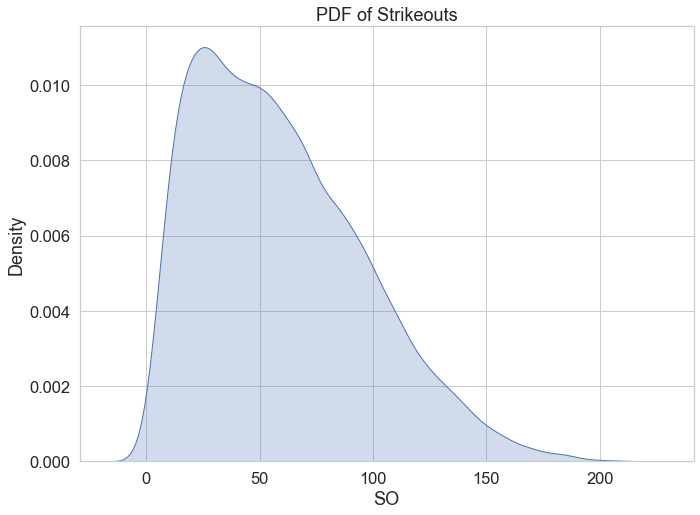

In [62]:
sns.kdeplot(salary_adj['SO'], shade=True)
plt.title("PDF of Strikeouts")

Text(0.5, 1.0, 'PDF of Sacrifice Flys')

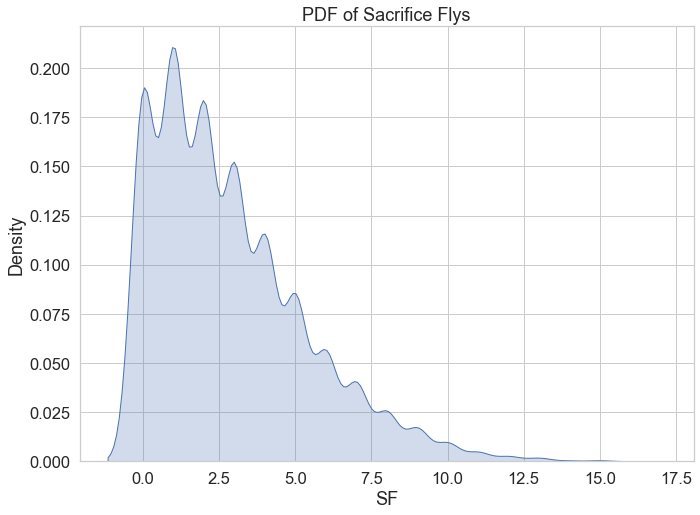

In [63]:
sns.kdeplot(salary_adj['SF'], shade=True)
plt.title("PDF of Sacrifice Flys")

Text(0.5, 1.0, 'PDF of Ground into Double Play')

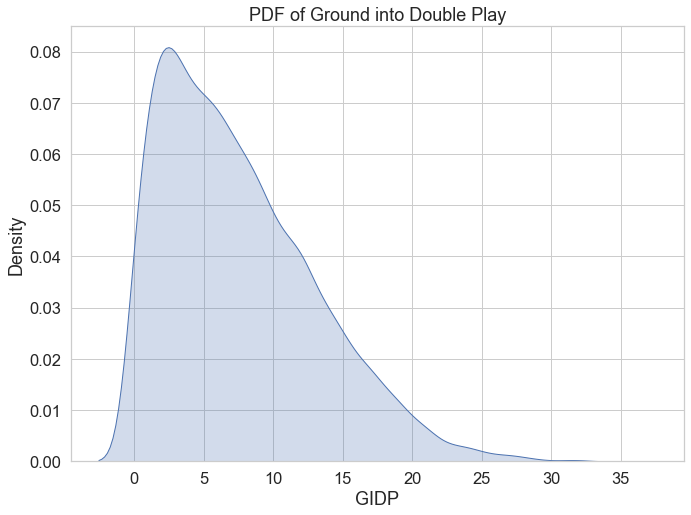

In [64]:
sns.kdeplot(salary_adj['GIDP'], shade=True)
plt.title("PDF of Ground into Double Play")

Text(0.5, 1.0, 'PDF of Years Played')

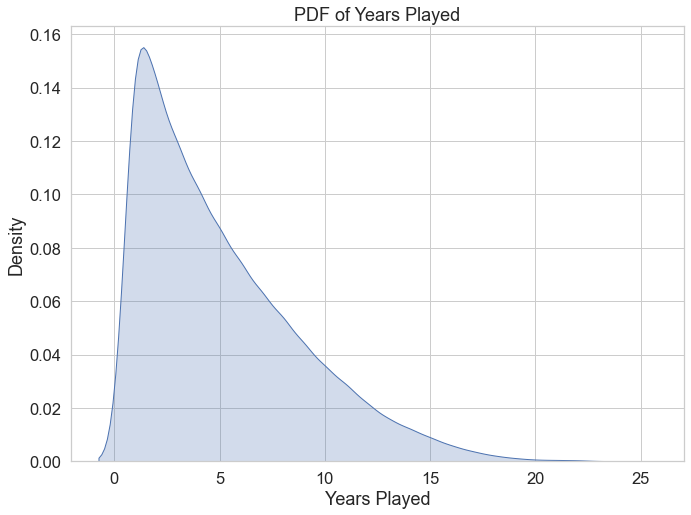

In [65]:
sns.kdeplot(salary_adj['Years Played'], shade=True)
plt.title("PDF of Years Played")

Text(0.5, 1.0, 'PDF of Caught Stealing')

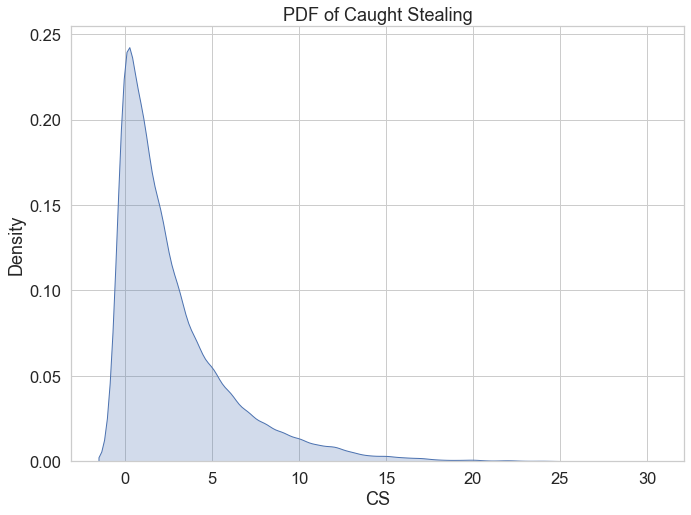

In [66]:
sns.kdeplot(salary_adj['CS'], shade=True)
plt.title("PDF of Caught Stealing")

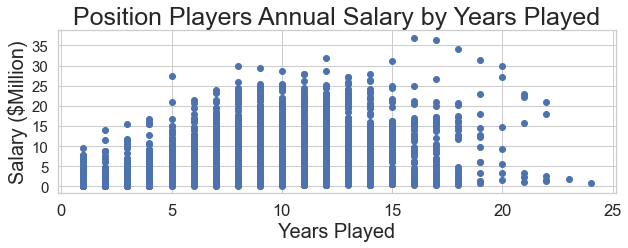

In [67]:
plt.figure(figsize=(10,3))
plt.scatter(salary_adj['Years Played'], salary_adj.salary2016)
plt.xlabel('Years Played', size=20)
plt.ylabel('Salary ($Million)', size=20)
plt.yticks(np.arange(40000000,step=5000000),(0,5,10,15,20,25,30,35), size=15)
plt.title('Position Players Annual Salary by Years Played', size=25);

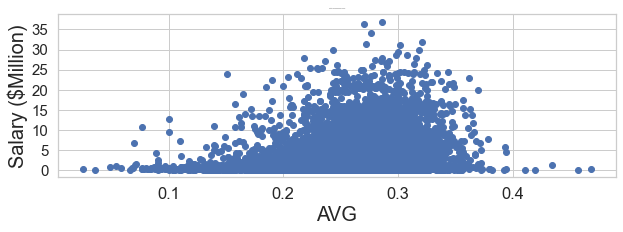

In [68]:
plt.figure(figsize=(10,3))
plt.scatter(salary_adj['AVG'], salary_adj.salary2016)
plt.xlabel('AVG', size=20)
plt.ylabel('Salary ($Million)', size=20)
plt.yticks(np.arange(40000000,step=5000000),(0,5,10,15,20,25,30,35), size=15)
plt.title('Position Players Annual Salary by AVG', size=1);

In [70]:
cols = ['salary', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SF', 'SH',
               'GIDP', 'AVG', 'OBP']
corr = salary_adj[cols].corr()
corr.style.background_gradient().set_precision(2)

,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SF,SH,GIDP,AVG,OBP
salary,1.00,0.25,0.32,0.34,0.33,0.33,0.01,0.39,0.38,0.04,-0.01,0.36,0.30,0.30,0.22,0.25,-0.15,0.32,0.19,0.25
G,0.25,1.00,0.95,0.87,0.92,0.84,0.48,0.65,0.82,0.42,0.47,0.75,0.77,0.45,0.46,0.63,0.23,0.70,0.49,0.46
AB,0.32,0.95,1.00,0.93,0.98,0.90,0.52,0.69,0.87,0.47,0.50,0.76,0.79,0.45,0.48,0.67,0.20,0.74,0.52,0.46
R,0.34,0.87,0.93,1.00,0.95,0.88,0.53,0.77,0.88,0.53,0.52,0.83,0.76,0.49,0.50,0.63,0.13,0.64,0.58,0.58
H,0.33,0.92,0.98,0.95,1.00,0.92,0.52,0.70,0.88,0.48,0.50,0.76,0.73,0.48,0.48,0.67,0.17,0.74,0.63,0.55
2B,0.33,0.84,0.90,0.88,0.92,1.00,0.42,0.69,0.85,0.35,0.38,0.71,0.70,0.47,0.47,0.65,0.07,0.69,0.58,0.52
3B,0.01,0.48,0.52,0.53,0.52,0.42,1.00,0.19,0.33,0.57,0.55,0.34,0.37,0.13,0.20,0.26,0.28,0.21,0.32,0.24
HR,0.39,0.65,0.69,0.77,0.70,0.69,0.19,1.00,0.90,0.13,0.15,0.71,0.74,0.56,0.43,0.55,-0.21,0.54,0.41,0.47
RBI,0.38,0.82,0.87,0.88,0.88,0.85,0.33,0.90,1.00,0.25,0.28,0.77,0.76,0.57,0.46,0.71,-0.07,0.70,0.54,0.53
SB,0.04,0.42,0.47,0.53,0.48,0.35,0.57,0.13,0.25,1.00,0.78,0.36,0.30,0.10,0.19,0.21,0.31,0.13,0.27,0.24


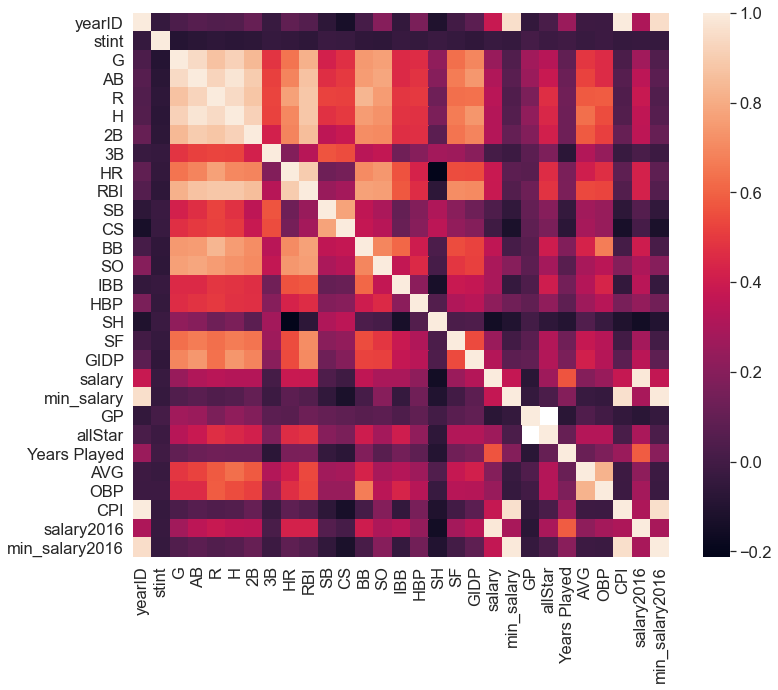

In [71]:
plt.subplots(figsize=(12,10))
sns.heatmap(salary_adj.corr());

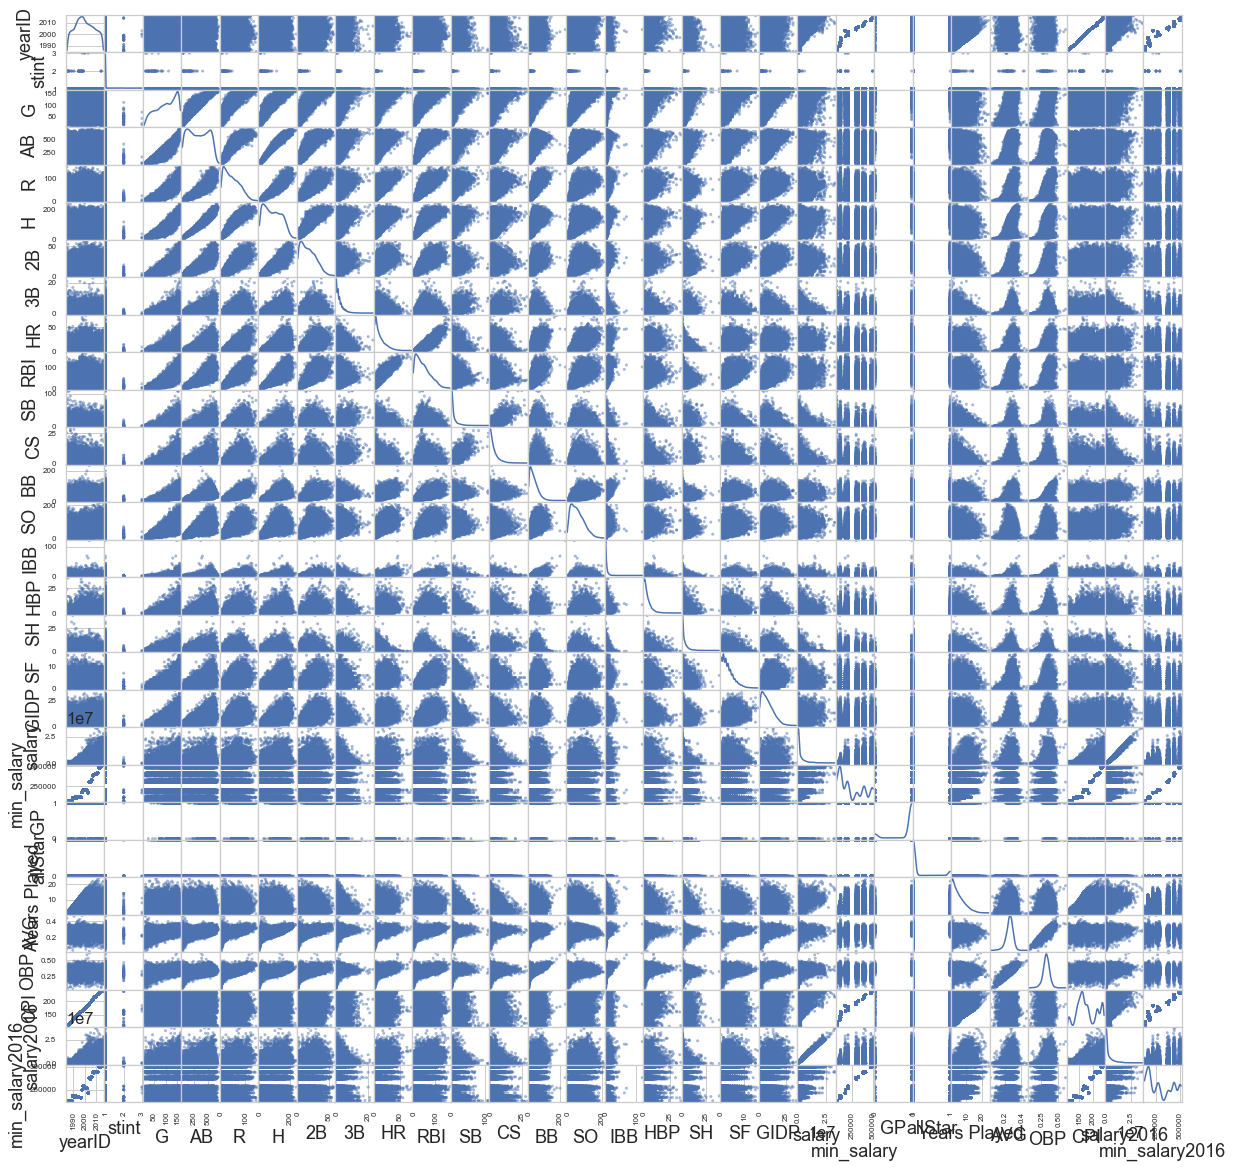

In [72]:
pd.plotting.scatter_matrix(salary_adj,figsize=[20, 20], alpha=0.5, diagonal='kde');

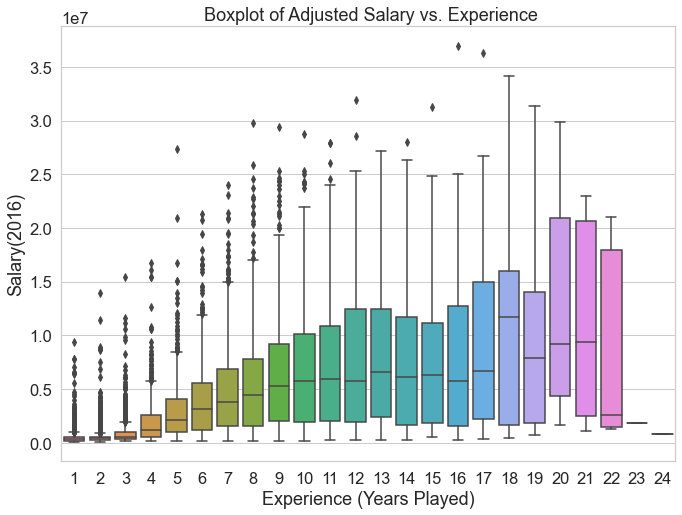

In [73]:
sns.boxplot(x="Years Played", y="salary2016", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Experience')
plt.xlabel('Experience (Years Played)')
plt.ylabel('Salary(2016)')

plt.show()

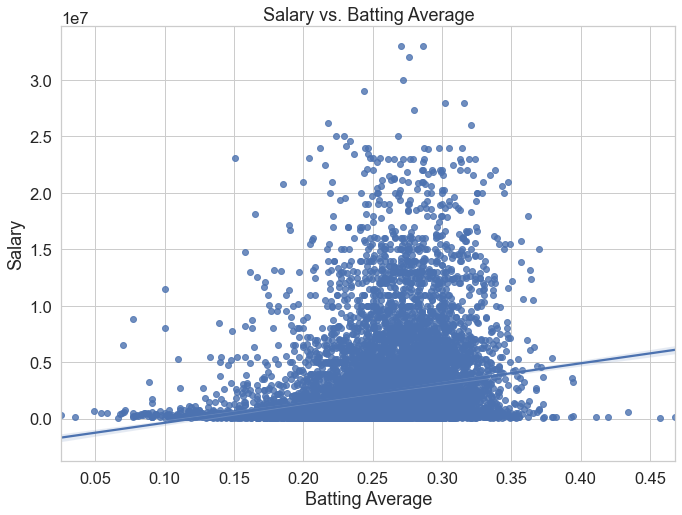

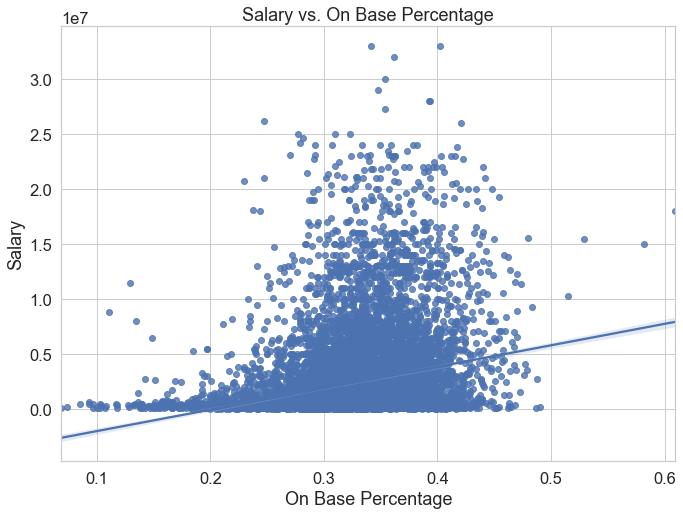

<ipython-input-74-e39a905711b0>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


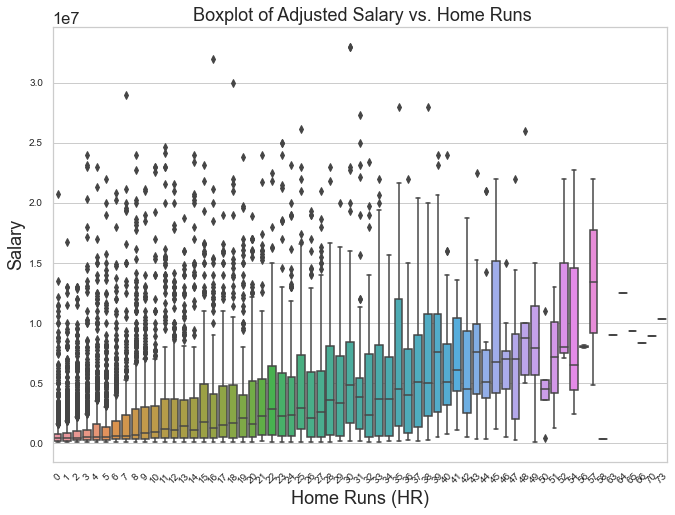

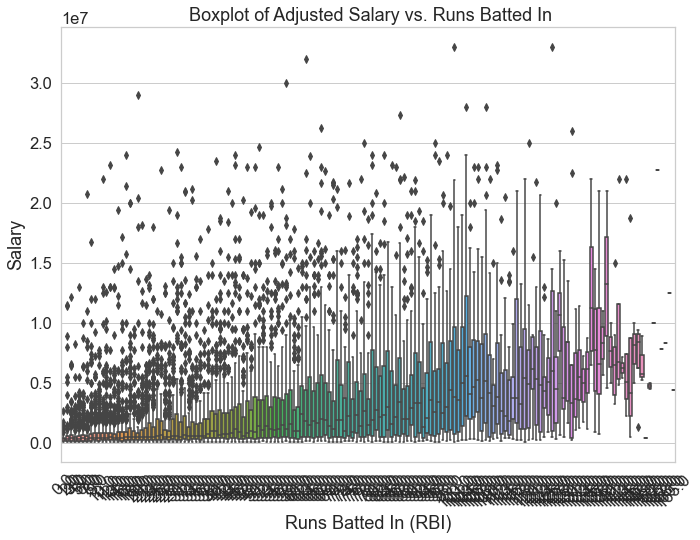

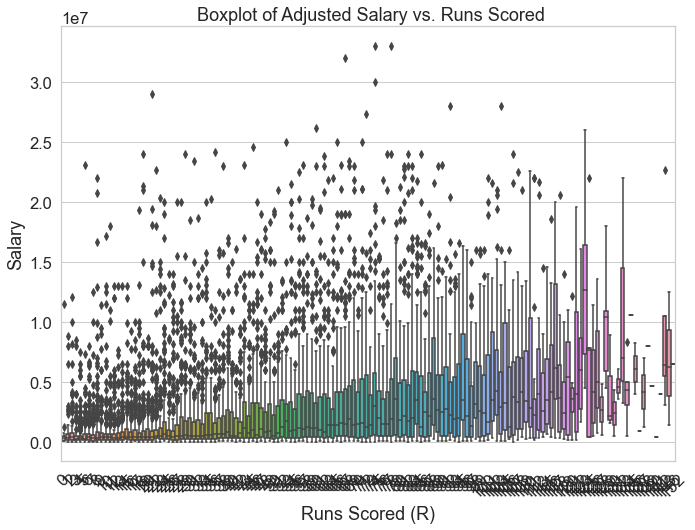

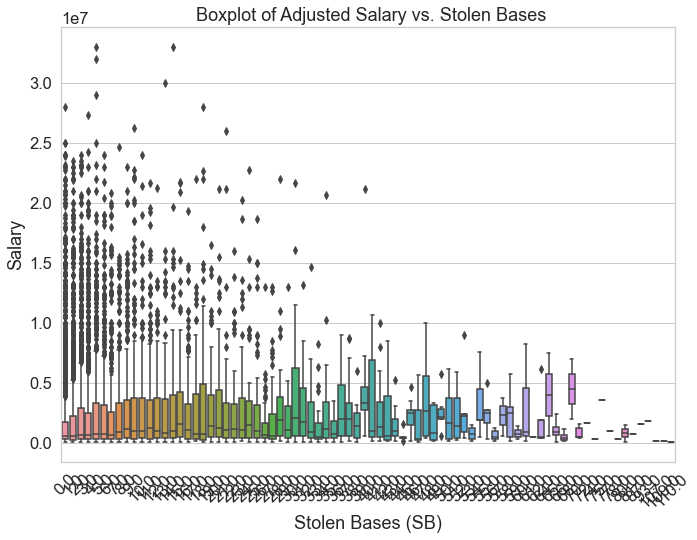

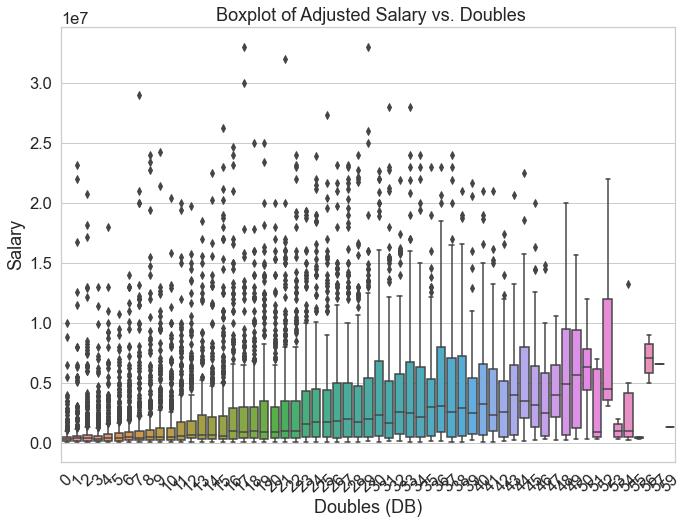

In [74]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

sns.regplot(x="AVG", y="salary", data=salary_adj)
plt.title('Salary vs. Batting Average')
plt.xlabel('Batting Average')
plt.ylabel('Salary')
plt.show()

sns.regplot(x="OBP", y="salary", data=salary_adj)
plt.title('Salary vs. On Base Percentage')
plt.xlabel('On Base Percentage')
plt.ylabel('Salary')
plt.show()

sns.boxplot(x="HR",y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Home Runs')
plt.xlabel('Home Runs (HR)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tick_params(labelsize=10)
ax = plt.axes()
plt.show()

sns.boxplot(x="RBI",y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Runs Batted In')
plt.xlabel('Runs Batted In (RBI)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="R",y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Runs Scored')
plt.xlabel('Runs Scored (R)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="SB", y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Stolen Bases')
plt.xlabel('Stolen Bases (SB)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="2B", y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. Doubles')
plt.xlabel('Doubles (DB)')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


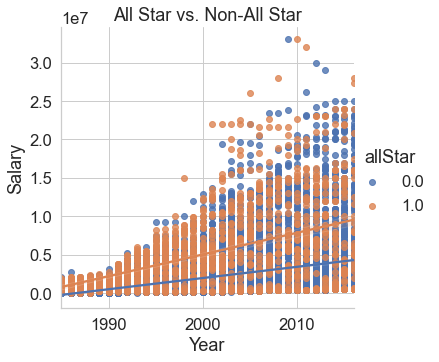

In [43]:
sns.lmplot(x='yearID',
            y='salary',
            hue = 'allStar',
            data=salary_adj)
plt.title('All Star vs. Non-All Star')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

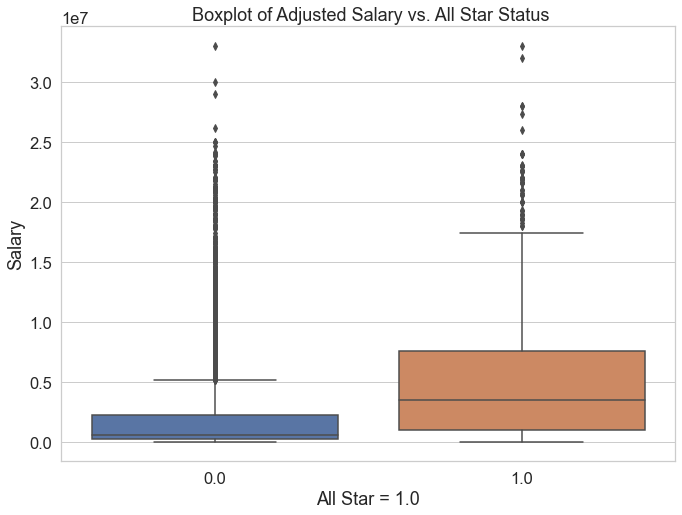

In [44]:
sns.boxplot(x="allStar", y="salary", data=salary_adj)
plt.title(' Boxplot of Adjusted Salary vs. All Star Status')
plt.xlabel('All Star = 1.0')
plt.ylabel('Salary')
plt.show()

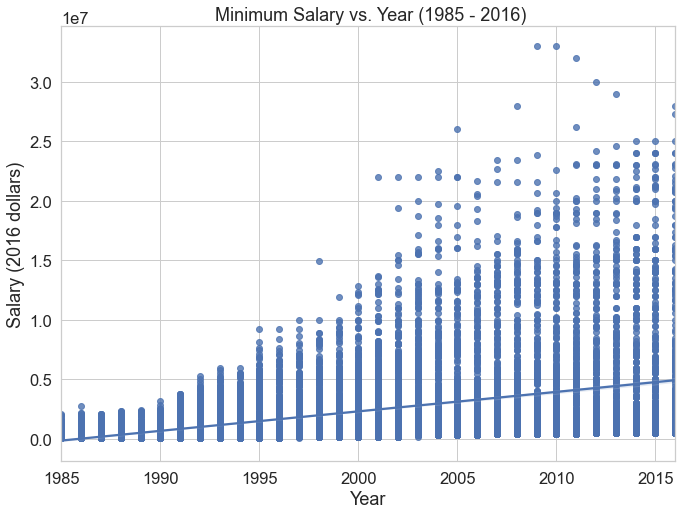

In [45]:
sns.regplot(x='yearID',
            y='salary',
           data=salary_adj)
plt.title(' Minimum Salary vs. Year (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary (2016 dollars)')
plt.show()

# FEATURE ENGINEERING

In [ ]:
#SHOULD WE DO A LAG ON TARGET AND FEAUTURES?

In [102]:
#Group together or do one by one?
df = salary_adj.copy()
col_names = ['salary', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SF', 'SH',
               'GIDP', 'AVG', 'OBP']
features = df[col_names]

In [103]:
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

features

array([[-0.13766437,  0.19444444,  0.24464832, ...,  0.5       ,
         0.09382452,  1.18955072],
       [ 0.1249104 , -0.45833333, -0.26911315, ..., -0.5       ,
        -0.7995345 , -0.16445285],
       [-0.16176921, -0.70833333, -0.85626911, ..., -0.625     ,
         0.1430746 ,  1.27929311],
       ...,
       [-0.07678918, -0.11111111,  0.14373089, ..., -0.125     ,
         0.23958886,  0.2700631 ],
       [-0.07678918, -0.93055556, -0.85015291, ..., -0.625     ,
        -3.47837799, -0.14234034],
       [-0.07678918, -0.47222222, -0.36697248, ..., -0.625     ,
        -0.0190903 ,  0.02943633]])